### 1. 라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")
import plotly.express as px
from konlpy.tag import Okt
import plotly
### 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
### 정규표현식
import re
### 형태소 분석기
from konlpy.tag import Okt
### 진행 상태바 표시하는 라이브러리 : tqdm
from tqdm import tqdm
### 단어 분류
from tensorflow.keras.preprocessing.text import Tokenizer
### 단어 자루고 채우기
from tensorflow.keras.preprocessing.sequence import pad_sequences

### 2. 전처리 된 파일 불러들이기

In [5]:
# 식당별 키워드 리뷰 불러들이기
df = pd.read_csv('./dacategory_count.csv')
df = df[~df['restaurant_name'].str.contains('호텔')]
len(df['naver_cat_review'].unique())
df['normalized']

0        0.225483
1        0.177606
2        0.138224
3        0.093436
4        0.076448
           ...   
18406    0.052632
18407    0.039474
18408    0.026316
18409    0.026316
18410    0.013158
Name: normalized, Length: 18411, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_16032\3062411370.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rc = c1[df['naver_cat_review'] == condition]


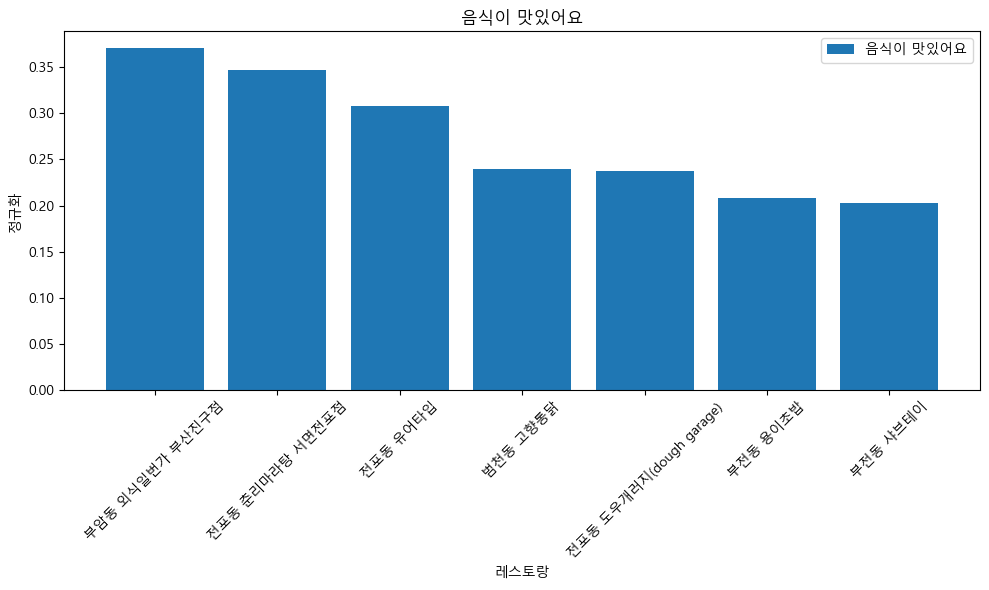

In [14]:
#친절해요           
#음식이 맛있어요       
#가성비가 좋아요       
#매장이 청결해요       
#특별한 메뉴가 있어요  
#재료가 신선해요
#양이많아요

import matplotlib.pyplot as plt

c1 = df.groupby(['restaurant_name']).head(5)
condition = '음식이 맛있어요'  
rc = c1[df['naver_cat_review'] == condition]

filtered_rc = rc.sort_values(by=['naver_cat_count'],
                             axis=0,
                             ascending=False)

top_restaurants = filtered_rc.nlargest(7, 'naver_cat_count')

top_reviews = filtered_rc[filtered_rc['restaurant_name'].isin(top_restaurants['restaurant_name'])].nlargest(10, 'naver_cat_count')

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
# 데이터를 큰 순서대로 정렬하여 그래프 그리기
for restaurant in top_reviews['naver_cat_review'].unique():
    data = top_reviews[top_reviews['naver_cat_review'] == restaurant]
    data_sorted = data.sort_values(by='normalized', ascending=False)  # 큰 순서대로 정렬
    plt.bar(data_sorted['restaurant_name'], data_sorted['normalized'], label=restaurant)

plt.xlabel('레스토랑')
plt.ylabel('정규화')
plt.title(condition)  # 조건 값을 그래프 제목으로 사용
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16032\3711392619.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rc = c1[df['naver_cat_review'] == condition]


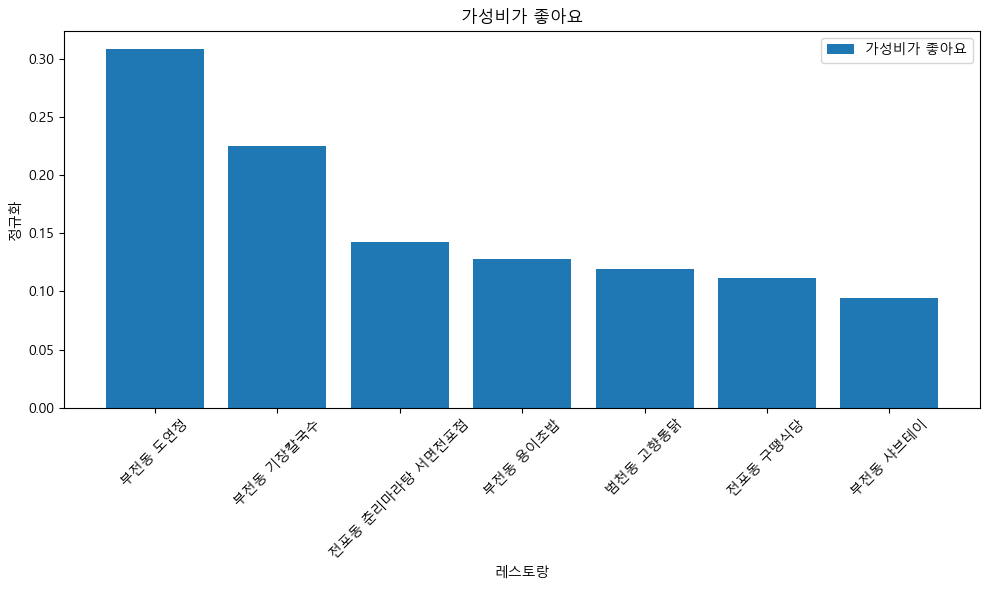

In [15]:
#친절해요           
#음식이 맛있어요       
#가성비가 좋아요       
#매장이 청결해요       
#특별한 메뉴가 있어요  
#재료가 신선해요
#양이많아요

import matplotlib.pyplot as plt

c1 = df.groupby(['restaurant_name']).head(5)
condition = '가성비가 좋아요'  
rc = c1[df['naver_cat_review'] == condition]

filtered_rc = rc.sort_values(by=['naver_cat_count'],
                             axis=0,
                             ascending=False)

top_restaurants = filtered_rc.nlargest(7, 'naver_cat_count')

top_reviews = filtered_rc[filtered_rc['restaurant_name'].isin(top_restaurants['restaurant_name'])].nlargest(10, 'naver_cat_count')

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
# 데이터를 큰 순서대로 정렬하여 그래프 그리기
for restaurant in top_reviews['naver_cat_review'].unique():
    data = top_reviews[top_reviews['naver_cat_review'] == restaurant]
    data_sorted = data.sort_values(by='normalized', ascending=False)  # 큰 순서대로 정렬
    plt.bar(data_sorted['restaurant_name'], data_sorted['normalized'], label=restaurant)

plt.xlabel('레스토랑')
plt.ylabel('정규화')
plt.title(condition)  # 조건 값을 그래프 제목으로 사용
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16032\2877581564.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rc = c1[df['naver_cat_review'] == condition]


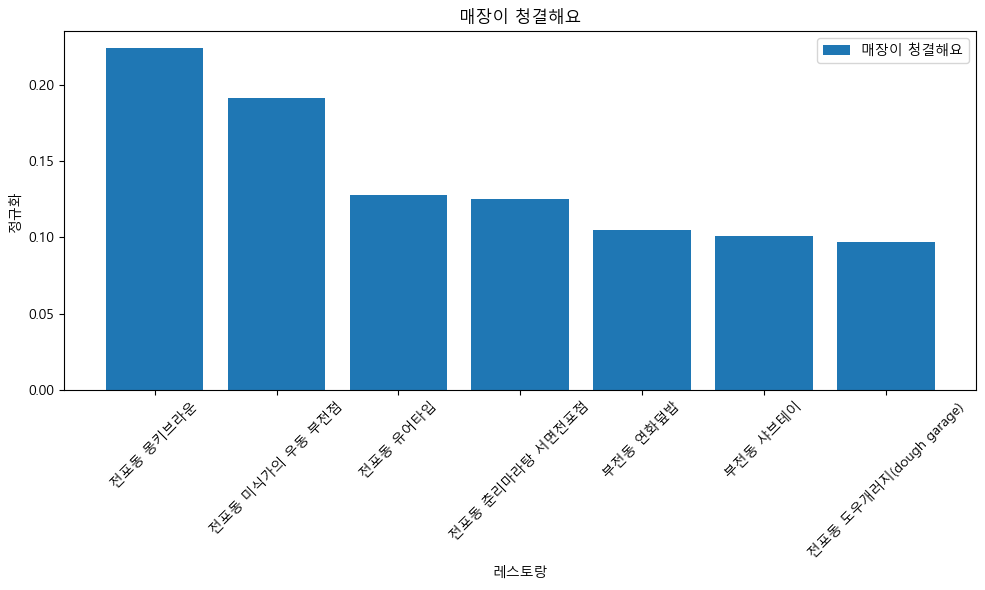

In [16]:
#친절해요           
#음식이 맛있어요       
#가성비가 좋아요       
#매장이 청결해요       
#특별한 메뉴가 있어요  
#재료가 신선해요
#양이많아요

import matplotlib.pyplot as plt

c1 = df.groupby(['restaurant_name']).head(5)
condition = '매장이 청결해요'  
rc = c1[df['naver_cat_review'] == condition]

filtered_rc = rc.sort_values(by=['naver_cat_count'],
                             axis=0,
                             ascending=False)

top_restaurants = filtered_rc.nlargest(7, 'naver_cat_count')

top_reviews = filtered_rc[filtered_rc['restaurant_name'].isin(top_restaurants['restaurant_name'])].nlargest(10, 'naver_cat_count')

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
# 데이터를 큰 순서대로 정렬하여 그래프 그리기
for restaurant in top_reviews['naver_cat_review'].unique():
    data = top_reviews[top_reviews['naver_cat_review'] == restaurant]
    data_sorted = data.sort_values(by='normalized', ascending=False)  # 큰 순서대로 정렬
    plt.bar(data_sorted['restaurant_name'], data_sorted['normalized'], label=restaurant)
    


plt.xlabel('레스토랑')
plt.ylabel('정규화')
plt.title(condition)  # 조건 값을 그래프 제목으로 사용
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16032\2677221947.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rc = c1[df['naver_cat_review'] == condition]


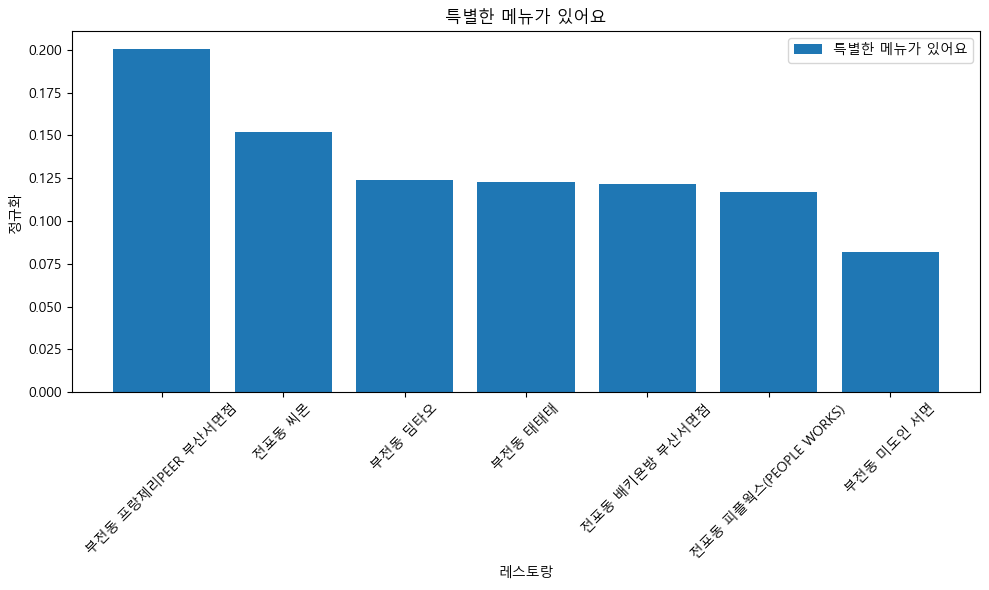

In [17]:
#친절해요           
#음식이 맛있어요       
#가성비가 좋아요       
#매장이 청결해요       
#특별한 메뉴가 있어요  
#재료가 신선해요
#양이많아요

import matplotlib.pyplot as plt

c1 = df.groupby(['restaurant_name']).head(5)
condition = '특별한 메뉴가 있어요'  
rc = c1[df['naver_cat_review'] == condition]

filtered_rc = rc.sort_values(by=['naver_cat_count'],
                             axis=0,
                             ascending=False)

top_restaurants = filtered_rc.nlargest(7, 'naver_cat_count')

top_reviews = filtered_rc[filtered_rc['restaurant_name'].isin(top_restaurants['restaurant_name'])].nlargest(10, 'naver_cat_count')

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
# 데이터를 큰 순서대로 정렬하여 그래프 그리기
for restaurant in top_reviews['naver_cat_review'].unique():
    data = top_reviews[top_reviews['naver_cat_review'] == restaurant]
    data_sorted = data.sort_values(by='normalized', ascending=False)  # 큰 순서대로 정렬
    plt.bar(data_sorted['restaurant_name'], data_sorted['normalized'], label=restaurant)

plt.xlabel('레스토랑')
plt.ylabel('정규화')
plt.title(condition)  # 조건 값을 그래프 제목으로 사용
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16032\1434705325.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rc = c1[df['naver_cat_review'] == condition]


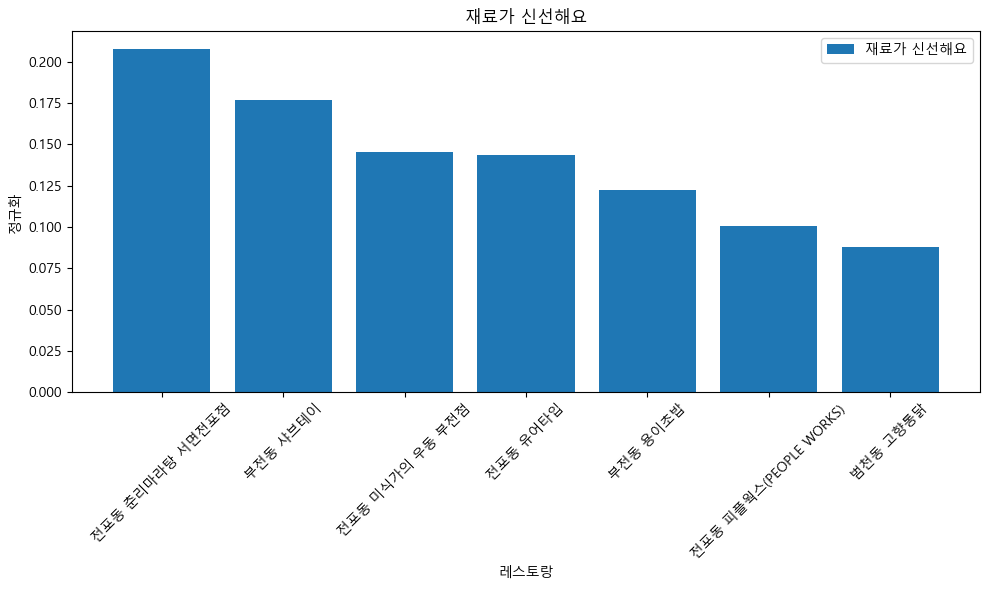

In [18]:
#친절해요           
#음식이 맛있어요       
#가성비가 좋아요       
#매장이 청결해요       
#특별한 메뉴가 있어요  
#재료가 신선해요
#양이많아요

import matplotlib.pyplot as plt

c1 = df.groupby(['restaurant_name']).head(5)
condition = '재료가 신선해요'  
rc = c1[df['naver_cat_review'] == condition]

filtered_rc = rc.sort_values(by=['naver_cat_count'],
                             axis=0,
                             ascending=False)

top_restaurants = filtered_rc.nlargest(7, 'naver_cat_count')

top_reviews = filtered_rc[filtered_rc['restaurant_name'].isin(top_restaurants['restaurant_name'])].nlargest(10, 'naver_cat_count')

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
# 데이터를 큰 순서대로 정렬하여 그래프 그리기
for restaurant in top_reviews['naver_cat_review'].unique():
    data = top_reviews[top_reviews['naver_cat_review'] == restaurant]
    data_sorted = data.sort_values(by='normalized', ascending=False)  # 큰 순서대로 정렬
    plt.bar(data_sorted['restaurant_name'], data_sorted['normalized'], label=restaurant)

plt.xlabel('레스토랑')
plt.ylabel('정규화')
plt.title(condition)  # 조건 값을 그래프 제목으로 사용
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16032\128245693.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rc = c1[df['naver_cat_review'] == condition]


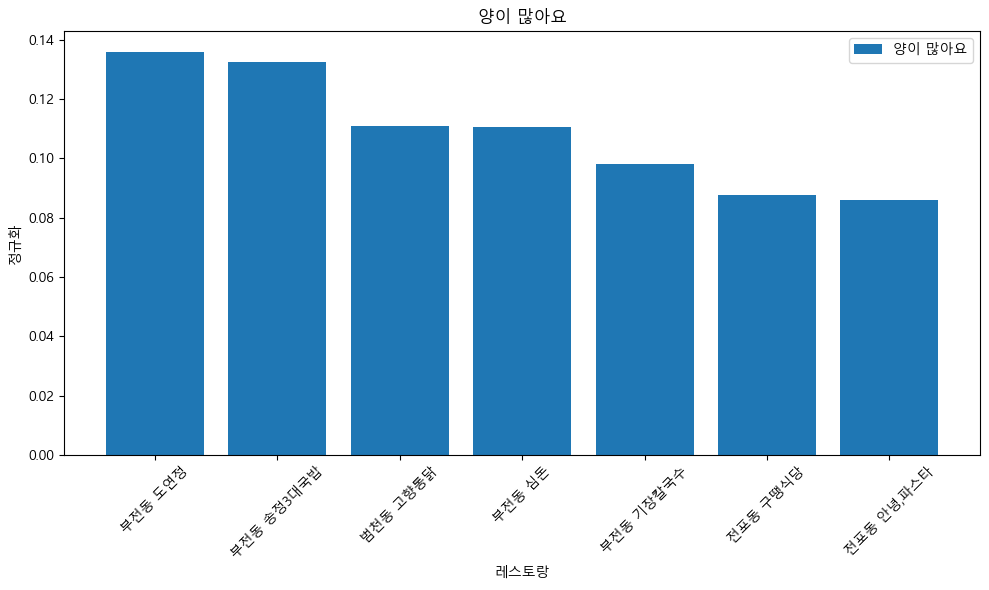

In [19]:
#친절해요           
#음식이 맛있어요       
#가성비가 좋아요       
#매장이 청결해요       
#특별한 메뉴가 있어요  
#재료가 신선해요
#양이많아요

import matplotlib.pyplot as plt

c1 = df.groupby(['restaurant_name']).head(5)
condition = '양이 많아요'  
rc = c1[df['naver_cat_review'] == condition]

filtered_rc = rc.sort_values(by=['naver_cat_count'],
                             axis=0,
                             ascending=False)

top_restaurants = filtered_rc.nlargest(7, 'naver_cat_count')

top_reviews = filtered_rc[filtered_rc['restaurant_name'].isin(top_restaurants['restaurant_name'])].nlargest(10, 'naver_cat_count')

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
# 데이터를 큰 순서대로 정렬하여 그래프 그리기
for restaurant in top_reviews['naver_cat_review'].unique():
    data = top_reviews[top_reviews['naver_cat_review'] == restaurant]
    data_sorted = data.sort_values(by='normalized', ascending=False)  # 큰 순서대로 정렬
    plt.bar(data_sorted['restaurant_name'], data_sorted['normalized'], label=restaurant)

plt.xlabel('레스토랑')
plt.ylabel('정규화')
plt.title(condition)  # 조건 값을 그래프 제목으로 사용
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16032\3049304901.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rc = c1[df['naver_cat_review'] == condition]


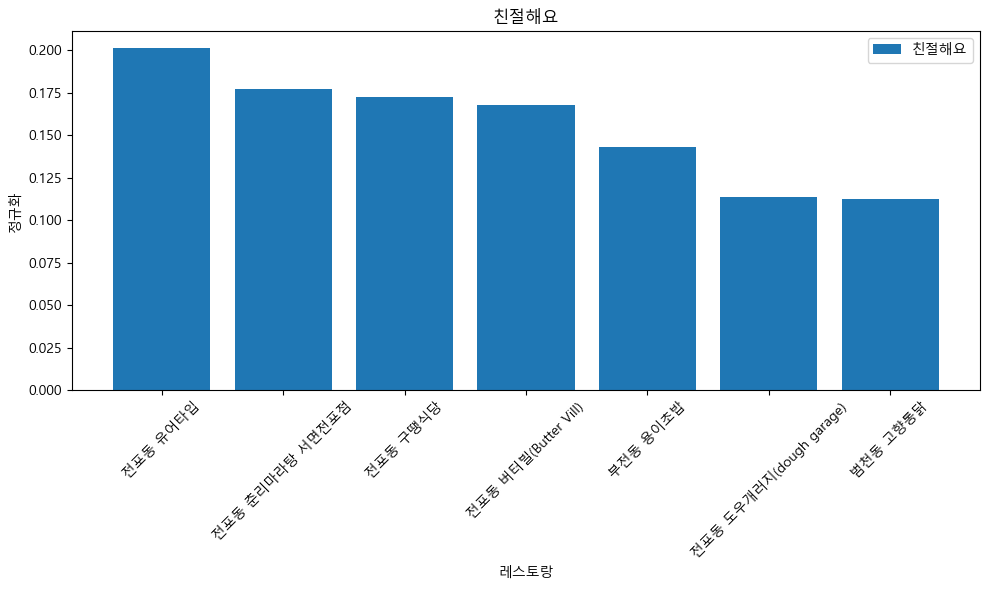

In [20]:
import matplotlib.pyplot as plt

c1 = df.groupby(['restaurant_name']).head(5)
condition = '친절해요'
rc = c1[df['naver_cat_review'] == condition]

filtered_rc = rc.sort_values(by=['naver_cat_count'],
                             axis=0,
                             ascending=False)

top_restaurants = filtered_rc.nlargest(7, 'naver_cat_count')

top_reviews = filtered_rc[filtered_rc['restaurant_name'].isin(top_restaurants['restaurant_name'])].nlargest(10, 'naver_cat_count')

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 데이터를 큰 순서대로 정렬하여 그래프 그리기
for restaurant in top_reviews['naver_cat_review'].unique():
    data = top_reviews[top_reviews['naver_cat_review'] == restaurant]
    data_sorted = data.sort_values(by='normalized', ascending=False)  # 큰 순서대로 정렬
    plt.bar(data_sorted['restaurant_name'], data_sorted['normalized'], label=restaurant)

plt.xlabel('레스토랑')
plt.ylabel('정규화')
plt.title(condition)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()